Length of dataset

In [10]:
import os
from glob import glob

dataset_path = 'MTHS/Data'
label_files = glob(os.path.join(dataset_path, 'label*'))
signal_files = glob(os.path.join(dataset_path, 'signal*'))

print(f"Length of label files: {len(label_files)} | Length of signal files: {len(signal_files)}")

Length of label files: 62 | Length of signal files: 62


Preview Dataset

In [11]:
import random
import numpy as np

label_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))
signal_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))


rnd_idx = random.randint(0, len(label_files))
print(f"File Path: {label_files[rnd_idx]} | {signal_files[rnd_idx]}")
label_data = np.load(label_files[rnd_idx])
signal_data = np.load(signal_files[rnd_idx])

In [12]:
print(f"Shape, Type, Dtype of label data: {label_data.shape}, {type(label_data)}, {label_data.dtype}")
print(f"Shape, Type, Dtype of signal data: {signal_data.shape}, {type(signal_data)}, {signal_data.dtype}")
print(f"First 10 rows of label data: {label_data[:10]}")
print(f"First 10 rows of signal data: {signal_data[:10]}")

Shape, Type, Dtype of label data: (79, 2), <class 'numpy.ndarray'>, float64
Shape, Type, Dtype of signal data: (2370, 3), <class 'numpy.ndarray'>, float64
First 10 rows of label data: [[83. 93.]
 [83. 93.]
 [82. 93.]
 [82. 93.]
 [82. 93.]
 [82. 92.]
 [81. 92.]
 [79. 92.]
 [80. 92.]
 [79. 93.]]
First 10 rows of signal data: [[252.53831501   7.30770014  25.52262201]
 [252.79863233   7.1984592   25.49896991]
 [252.7511521    7.27848669  25.47433497]
 [252.68531539   7.38418403  25.41771508]
 [252.64747444   7.43267699  25.39859857]
 [252.59655912   7.52350598  25.44131173]
 [252.71342448   7.51572338  25.41394772]
 [252.66284047   7.38860822  25.40612895]
 [252.65126543   7.35326051  25.39639226]
 [252.68332369   7.2833695   25.38173032]]


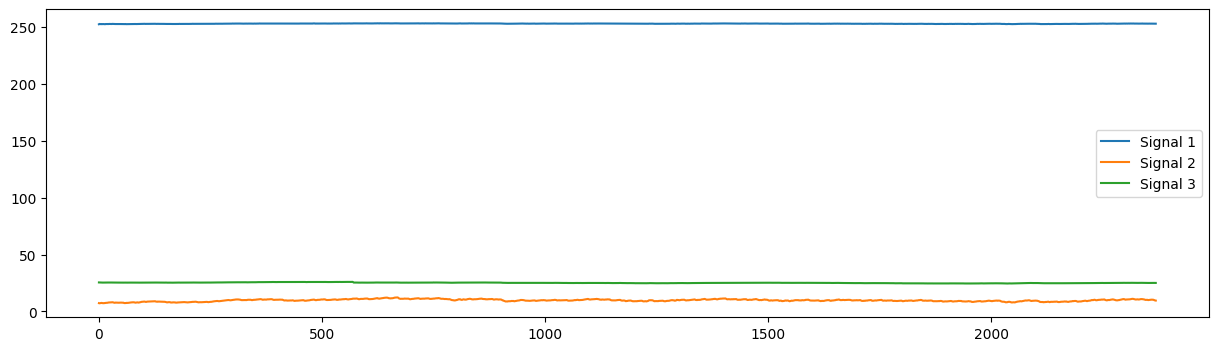

In [13]:
# plot the signal data
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))
plt.plot(signal_data[:, 0], label='Signal 1')
plt.plot(signal_data[:, 1], label='Signal 2')
plt.plot(signal_data[:, 2], label='Signal 3')
plt.legend()
plt.show()


Convert mean RGB to rPPG signals

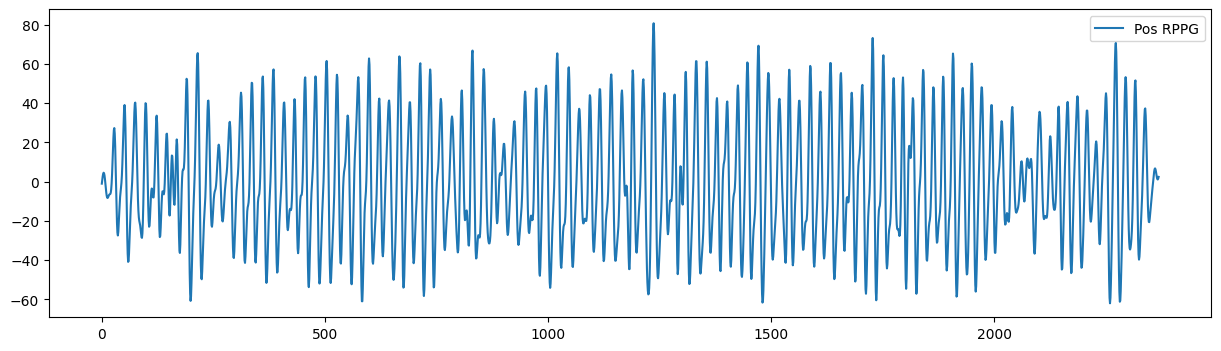

In [14]:
from pos import get_pos_rppg

pos_signal = get_pos_rppg(signal_data, bp=[0.8, 2.8])
plt.figure(figsize=(15, 4))
plt.plot(pos_signal, label='Pos RPPG')
plt.legend()
plt.show()

In [15]:
print(f"Length of pos signal: {len(pos_signal)}")

Length of pos signal: 2370


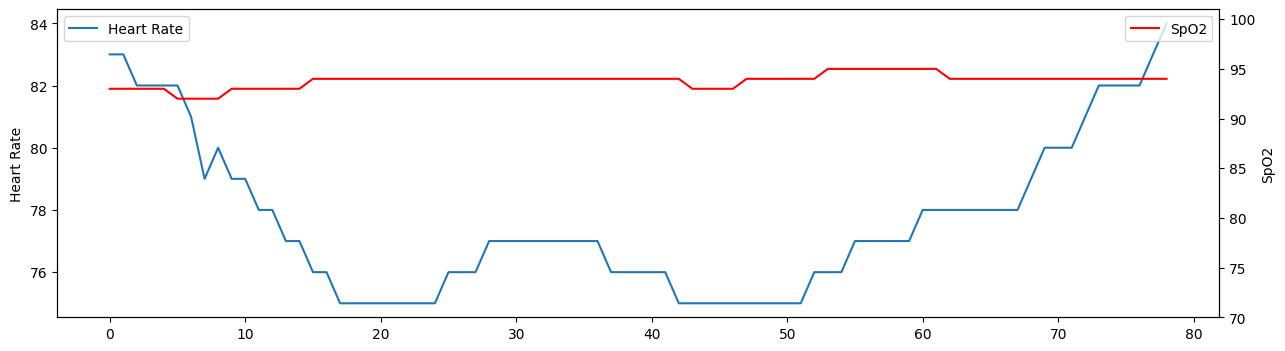

In [16]:
plt.figure(figsize=(15, 4))

# Plot Heart Rate on the primary y-axis
plt.plot(label_data[:, 0], label='Heart Rate')
plt.ylabel('Heart Rate')
plt.legend(loc='upper left')

# Create a second y-axis for SpO2
ax2 = plt.twinx()
ax2.plot(label_data[:, 1], label='SpO2', color='red')  # Use a different color for SpO2
ax2.set_ylabel('SpO2')
ax2.set_ylim(70, 101)  # Set the y-axis limits for SpO2 from 90 to 100
ax2.legend(loc='upper right')

plt.show()


In [17]:
print(f"Length of label data: {len(label_data)}")

Length of label data: 79
